#        FINANCIAL DATA INFRASTRUCTURE     
##                    Rennes School of Business
##                     Group Project Identification of Non-fungible token
####       
                                        Winter 2022

###The Ethereum NFTs and FT Dataset
The majority of recent NFT hype has been centered around the Ethereum blockchain. We will therefore restrict our analysis to NFT and FT operations on the Ethereum blockchain.



### Contracts, tokens, and events
A non-fungible token is a digital asset representing a distinct idea or physical object.

On the Ethereum blockchain, these tokens are created using Ethereum smart contracts which represent entire collections of non-fungible tokens. The most famous examples of such contracts are CryptoPunks and CryptoKitties.

 Every time an NFT is transferred on the Ethereum blockchain, it emits a Transfer event which is stored on the blockchain. This dataset was constructed by crawling the emitted Transfer events that were emitted in the period of time represented by the dataset.

### ERC-20
The ERC-20 (Ethereum Request for Comments 20) Token Standard allows for fungible tokens on the Ethereum blockchain.

### ERC721
Anyone interested in creating non-fungible tokens is free to implement their tokens in any manner whatsoever as long as their implementation satisfies the non-fungibility condition. The most common implementation follows the Ethereum ERC721 protocol.

#####**************************************************#####

There is real value in following a standard such as ERC721. There is a growing ecosystem of secondary protocols that only allow NFTs which follow these standards to participate. Secondary markets for NFTs, such as Nifty Gateway and OpenSea, make the fundamental operational assumption that the tokens they list follow these standards. As a consequence, ERC721-compliant tokens account for the overwhelming majority of Ethereum NFTs.


### Your task
* How to classify the FT and NFT? what are main factors for classification?
* Who owns NFTs on the Ethereum blockchain? (Who is buying NFTs?)
* Are NFTs for a small number of wealthy elite or are they for the masses?
* Who owns FTs on the Ethereum blockchain?....




Create a Google Cloud account

https://cloud.google.com/apigee/docs/hybrid/v1.3/precog-gcpaccount

Getting started with authentication

https://cloud.google.com/docs/authentication/getting-started

We update pandas & google-cloud-bigquery.
In order to make it work, you might need to enable `Internet` in the settings config.

In [ ]:
#!pip install google-cloud-bigquery -U
!pip install pandas -U

In [ ]:
#pip install bigquery

In [ ]:
#import os
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= "keys.json"

In [ ]:
#from google.cloud import bigquery
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import itertools

#import os
import time
import zipfile
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, recall_score,precision_score, precision_recall_curve, f1_score, fbeta_score
#from sklearn.utils.fixes import signature

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#client = bigquery.Client()

In [ ]:
'''
def query_to_csv(sql, output_path):
    df = client.query(sql).to_dataframe(progress_bar_type='tqdm_notebook')
    df.to_csv(output_path, mode='a', index=False, header=not os.path.exists(output_path), compression='gzip')
'''


In [ ]:
# Below is the query that will give you NFTs, or non-fungible tokens
'''
NFT_sql=
select
    b.block_timestamp,
    transaction_hash,
    status,
    value,
    gas_price,
    gas_used,
    gas_limit,
    block_number,
    gas_usedcumul,
    receipt_effective_gas_price,
    NoTrascbysenderBefor,
    GasMmessagCall,
    difficulty,
    total_difficulty,
    size,
    gaslimitblock,
    blockgas,
    from_address,
    to_address,
    balanceSender,
    balanceReciever,
    transaction_count,
    base_fee_per_gas,
    is_erc721,
    is_erc20
from
    (
        select
            block_timestamp,
            `hash`,
            to_address,
            from_address,
            value,
            block_timestamp,
            gas_price,
            block_number,
            gas as gas_limit,
            receipt_gas_used as gas_used,
            receipt_cumulative_gas_used as gas_usedcumul,
            max_fee_per_gas,
            max_priority_fee_per_gas,
            transaction_type,
            receipt_effective_gas_price,
            nonce as NoTrascbysenderBefor

        from
            bigquery-public-data.crypto_ethereum.transactions
        where true
              and date(block_timestamp) BETWEEN '2022-01-01' AND '2022-02-28'
    ) a
    join
    (
        select
            block_timestamp,
            transaction_hash,
            status,
            trace_type,
            call_type,
            reward_type,
            gas as GasMmessagCall
        from
            bigquery-public-data.crypto_ethereum.traces
        where true
            and date(block_timestamp)  BETWEEN '2022-01-01' AND '2022-02-28'
            and trace_address is null
    ) b
on a.hash = b.transaction_hash
    join
    (
        select
            timestamp,
            number,
            difficulty,
            total_difficulty,
            size,
            gas_limit as gaslimitblock,
            gas_used as blockgas,
            transaction_count,
            base_fee_per_gas
        from
            bigquery-public-data.crypto_ethereum.blocks
        where true
            and date(timestamp)  BETWEEN '2022-01-01' AND '2022-02-28'
    ) c
on c.number = a.block_number
    join
    (
        select
            block_timestamp,
            is_erc721,
            is_erc20,
            block_number as contractblockno
        from
            bigquery-public-data.crypto_ethereum.contracts
        where true
              and is_erc721 is true
              and DATE(block_timestamp) BETWEEN '2022-01-01' AND '2022-02-28'
    ) d
on c.number = d.contractblockno
    join
    (
      select
           eth_balance as balanceSender,
            address
        from
            bigquery-public-data.crypto_ethereum.balances
    ) e
on a.from_address = e.address
    join
    (
      select
           eth_balance as balanceReciever,
            address
        from
            bigquery-public-data.crypto_ethereum.balances
    ) f
on a.to_address = f.address
'''

In [ ]:
# Below is the query that will give you fungible Tokens
'''
FT_sql=
select
    b.block_timestamp,
    transaction_hash,
    status,
    value,
    gas_price,
    gas_used,
    gas_limit,
    block_number,
    gas_usedcumul,
    receipt_effective_gas_price,
    NoTrascbysenderBefor,
    GasMmessagCall,
    difficulty,
    total_difficulty,
    size,
    gaslimitblock,
    blockgas,
    from_address,
    to_address,
    balanceSender,
    balanceReciever,
    transaction_count,
    base_fee_per_gas,
    is_erc721,
    is_erc20
from
    (
        select
            block_timestamp,
            `hash`,
            to_address,
            from_address,
            value,
            block_timestamp,
            gas_price,
            block_number,
            gas as gas_limit,
            receipt_gas_used as gas_used,
            receipt_cumulative_gas_used as gas_usedcumul,
            max_fee_per_gas,
            max_priority_fee_per_gas,
            transaction_type,
            receipt_effective_gas_price,
            nonce as NoTrascbysenderBefor

        from
            bigquery-public-data.crypto_ethereum.transactions
        where true
              and date(block_timestamp) BETWEEN '2022-01-01' AND '2022-02-28'
    ) a
    join
    (
        select
            block_timestamp,
            transaction_hash,
            status,
            trace_type,
            call_type,
            reward_type,
            gas as GasMmessagCall
        from
            bigquery-public-data.crypto_ethereum.traces
        where true
            and date(block_timestamp)  BETWEEN '2022-01-01' AND '2022-02-28'
            and trace_address is null
    ) b
on a.hash = b.transaction_hash
    join
    (
        select
            timestamp,
            number,
            difficulty,
            total_difficulty,
            size,
            gas_limit as gaslimitblock,
            gas_used as blockgas,
            transaction_count,
            base_fee_per_gas
        from
            bigquery-public-data.crypto_ethereum.blocks
        where true
            and date(timestamp)  BETWEEN '2022-01-01' AND '2022-02-28'
    ) c
on c.number = a.block_number
    join
    (
        select
            block_timestamp,
            is_erc721,
            is_erc20,
            block_number as contractblockno
        from
            bigquery-public-data.crypto_ethereum.contracts
        where true
              and is_erc20 is true
              and DATE(block_timestamp) BETWEEN '2022-01-01' AND '2022-02-28'
    ) d
on c.number = d.contractblockno
    join
    (
      select
           eth_balance as balanceSender,
            address
        from
            bigquery-public-data.crypto_ethereum.balances
    ) e
on a.from_address = e.address
    join
    (
      select
           eth_balance as balanceReciever,
            address
        from
            bigquery-public-data.crypto_ethereum.balances
    ) f
on a.to_address = f.address
'''

In [ ]:
'''
bal_q =
 select
      eth_balance as balanceSender,
      address
  from
      bigquery-public-data.crypto_ethereum.balances
'''

In [ ]:
#query_to_csv(NFT_sql, "NFT.csv.gz")

In [ ]:
#query_to_csv(FT_sql, "FT.csv.gz")

In [ ]:
#NFT_df = pd.read_csv('NFT.csv.gz', compression='gzip', header=0,    sep=',', quotechar='"', error_bad_lines=False)
#FT_df = pd.read_csv('FT.csv.gz', compression='gzip', header=0,    sep=',', quotechar='"', error_bad_lines=False)

In [ ]:
#FT_df.columns

In [ ]:
#NFT_df['Type'] = 0 #NFT
#FT_df['Type'] = 1 #FT

In [ ]:
#df = pd.concat([NFT_df,FT_df])
df = pd.read_csv('/content/drive/MyDrive/DriveUploader/NFT_FTquery')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
NFT_df = df[df['Type'] == 0]
FT_df = df[df['Type'] == 1]

In [ ]:
print(NFT_df.shape, FT_df.shape)

(19560, 27) (41038, 27)


In [ ]:
df

,Unnamed: 0,block_timestamp,transaction_hash,status,value,gas_price,gas_used,gas_limit,block_number,gas_usedcumul,...,blockgas,from_address,to_address,balanceSender,balanceReciever,transaction_count,base_fee_per_gas,is_erc721,is_erc20,Type
0,0,2022-02-07 14:14:42+00:00,0x58903c44ff85e7af02dc529ea51615d573b31200421d...,1,0.000000e+00,122732415638,46271,46271,14159398,28045642,...,28728884.0,0x2859f4cc50e138331de48864dfc9b74fc3c302fe,0x86c10d10eca1fca9daf87a279abccabe0063f247,6.747505e+18,0.000000e+00,45.0,1.212324e+11,True,False,0.0
1,1,2022-02-07 14:14:42+00:00,0x60f1e760b2369622d0ba76c20428e0bb65e4dd11f8ef...,1,0.000000e+00,122732415638,46271,46271,14159398,27051888,...,28728884.0,0x9e6d504885e7516f3647cc63729cd1f40f482220,0x86c10d10eca1fca9daf87a279abccabe0063f247,5.497026e+13,0.000000e+00,45.0,1.212324e+11,True,False,0.0
2,2,2022-02-07 14:14:42+00:00,0x51ae413adcdf8e22b553d83aa7807988a0b035fc1b31...,1,5.000000e+17,145963054022,100712,100712,14159398,604594,...,28728884.0,0x5201e1074fa64387652e9627912a91f8eea25c30,0x86c10d10eca1fca9daf87a279abccabe0063f247,8.834760e+15,0.000000e+00,45.0,1.212324e+11,True,False,0.0
3,3,2022-01-19 03:13:14+00:00,0x9e9787600dd9426dad12d4ed5d808bfb128af52f4b2d...,1,0.000000e+00,89794167292,101574,520988,14033495,101574,...,10423558.0,0x03bfbd24d32aa20bb524be8de24040feaa9dfca1,0x49307d775728daf1d4736ab762de0cefd035e323,1.613876e+19,0.000000e+00,80.0,8.979417e+10,True,False,0.0
4,4,2022-01-19 03:13:14+00:00,0x54fd9f399bff3fe66bbf7d0ccab7da3257e95a0b3925...,1,0.000000e+00,622543566677,98893,148893,14033495,399699,...,10423558.0,0x03bfbd24d32aa20bb524be8de24040feaa9dfca1,0x49307d775728daf1d4736ab762de0cefd035e323,1.613876e+19,0.000000e+00,80.0,8.979417e+10,True,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60594,41034,2022-02-28 00:58:49+00:00,0xd4416282236a778867f3be54d9c54a383e984324b73b...,1,4.000000e+16,50608610173,21000,21000,14291572,20663869,...,23457733.0,0x85d13339bbaae1cf5a46505fc8ab868741b04d94,0xa1a7b966c3d8c8b08c6b31538a1e53f3f8d524b4,6.198578e+13,8.171447e+14,256.0,4.910861e+10,False,True,1.0
60595,41035,2022-02-11 08:23:52+00:00,0xf1c86feaa2f90503709f836e36e692877203ca4f3f65...,1,2.309609e+17,60000000000,21000,90000,14183660,4698887,...,20734762.0,0x73f8fc2e74302eb2efda125a326655acf0dc2d1b,0xd344fd5020c2db0c4d2312f27d34ba0966b4f69f,1.882576e+21,2.309609e+17,256.0,3.997954e+10,False,True,1.0
60596,41036,2022-02-11 08:23:52+00:00,0xbdb82036938ad168520421e16e1e3d98adbcc623e3a4...,1,0.000000e+00,45971000000,29726,41431,14183660,6161338,...,20734762.0,0x7f653d2242c90d15ee4dc29780b5df70f92057e4,0x595832f8fc6bf59c85c527fec3740a1b7a361269,3.181712e+16,0.000000e+00,256.0,3.997954e+10,False,True,1.0
60597,41037,2022-02-28 00:58:49+00:00,0xf17585ec62b4486a37475731ee6344e04c8b528fbb68...,1,0.000000e+00,50608610173,397602,516883,14291572,14486120,...,23457733.0,0x28da37b393e4de8bca0d08a6e883ddf6b33bd4c2,0xa5409ec958c83c3f309868babaca7c86dcb077c1,1.663942e+16,0.000000e+00,256.0,4.910861e+10,False,True,1.0


In [ ]:
 addresses = pd.DataFrame()
 addresses['Adress'] = pd.concat([df['from_address'],df['to_address']]).drop_duplicates().reset_index(drop=True)

#Which address is buying NFTs the most? (receiver)

 is buying FTs the most? (receiver)

In [ ]:
# Adresses of most received value in Wei. 1 ETH equal 1_000_000_000_000_000_000 Wei so we can make the conversion.

#Frame for NFT value.
frame1 = NFT_df.groupby('to_address').sum().sort_values('value',ascending = False)
frame1_no0 = frame1[frame1['value'] != 0] # we dropping 0s in transactions with 0 in value
frame1_no0['value'] = frame1_no0['value']/(1_000_000_000_000_000_000) #Changing value form wei -> ETH
frame1_no0['gas_usedcumul'] = frame1_no0['gas_usedcumul']/(1_000_000_000_000_000_000)
top20_NFT = frame1_no0[0:20] #top 20



#Frame for FT value.
frame2 = FT_df.groupby('to_address').sum().sort_values('value',ascending = False).reset_index()
frame2_no0 = frame2[frame2['value'] != 0]# we dropping 0s in transactions with 0 in value
frame2_no0['value'] = frame2_no0['value']/(1_000_000_000_000_000_000) #Changing value form wei -> ETH
frame2_no0['gas_usedcumul'] = frame2_no0['gas_usedcumul']/(1_000_000_000_000_000_000)
top20_FT = frame2_no0[0:20] #top 20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
print('NFT descriptive stats');
print(frame1_no0['value'].describe());
print('FT descriptive stats');
print(frame2_no0['value'].describe())

NFT descriptive stats
count    5.573000e+03
mean     7.656850e+00
std      1.808097e+02
min      1.000000e-18
25%      2.800000e-02
50%      9.927179e-02
75%      3.173420e-01
max      8.690172e+03
Name: value, dtype: float64
FT descriptive stats
count    1.237600e+04
mean     3.284123e+00
std      5.332883e+01
min      9.000000e-18
25%      2.555395e-02
50%      9.810153e-02
75%      3.000000e-01
max      2.482000e+03
Name: value, dtype: float64


[[],
 Text(0.5, 1.0, 'Top 20 addresses ETH send in Non-Fungible Tokens (01-01 to 02-28)')]

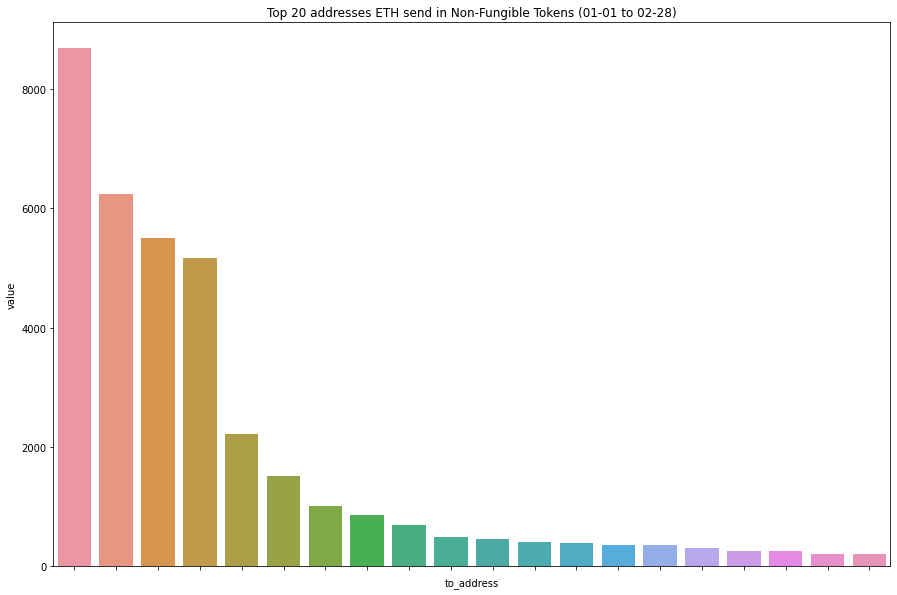

In [ ]:
fig,ax = plt.subplots(figsize = (15,10))
sns.barplot(x = top20_NFT.index , y = 'value', data = top20_NFT).set(xticklabels=[],\
                                                                     title ='Top 20 addresses ETH send in Non-Fungible Tokens (01-01 to 02-28)')

[[],
 Text(0.5, 1.0, 'Top 20 addresses ETH send in Fungible Tokens (01-01 to 02-28)')]

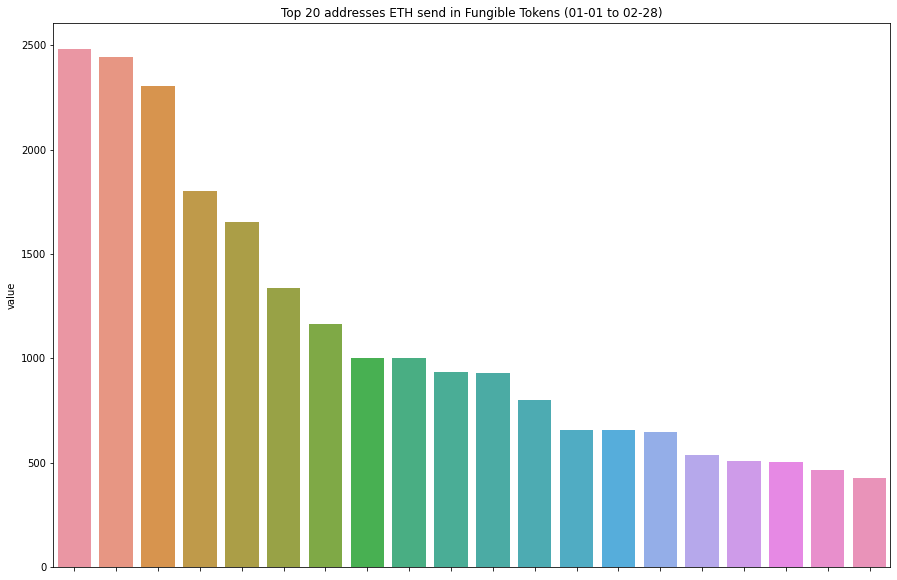

In [ ]:
dffig,ax = plt.subplots(figsize = (15,10))
sns.barplot(x = top20_FT.index , y = 'value', data = top20_FT ).set(xticklabels=[],\
                                                                    title ='Top 20 addresses ETH send in Fungible Tokens (01-01 to 02-28)')

# Are NFTs for the wealthy?

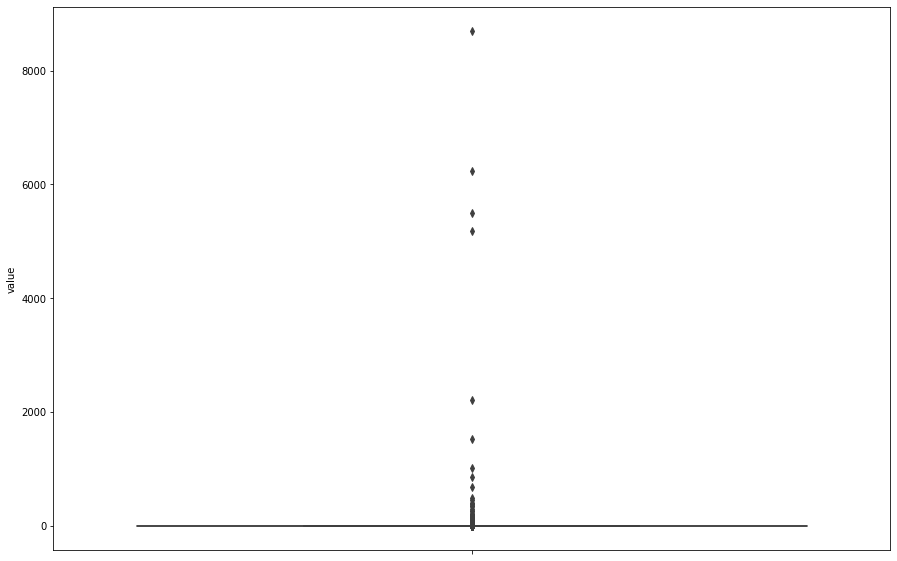

In [ ]:
fig, ax = plt.subplots(figsize = (15,10))
sns.boxplot(y = 'value', data = frame1_no0) # we have multiple outliers.

In [ ]:
frame1_noO = frame1_noO[frame1_noO['value']<2]
fig, ax = plt.subplots(figsize = (15,10))
sns.distplot(frame1_noO['value'])

NameError: ignored

# Gas comparison.

1.046326086702032e-11


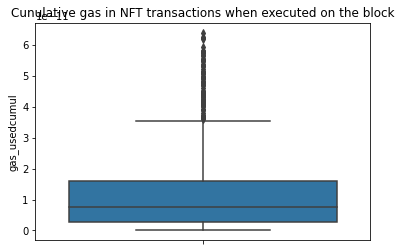

In [ ]:
plot = frame1_no0[frame1_no0['gas_usedcumul'] <= .000000000064]
sns.boxplot(y = 'gas_usedcumul', data = plot).set(title = 'Cunulative gas in NFT transactions when executed on the block')
print(plot['gas_usedcumul'].mean())

2.575669899145124e-11


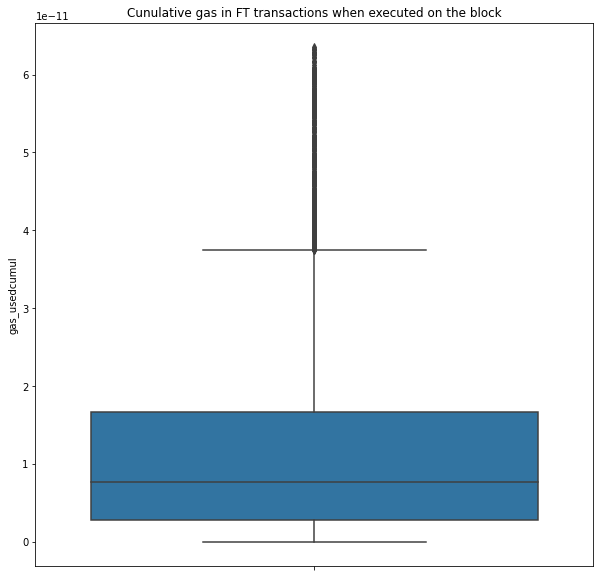

In [ ]:
#The total amount of gas used when this transaction was executed in the block in FT transaction.
plot = frame2_no0[frame2_no0['gas_usedcumul'] <= .000000000064]
sns.boxplot(y = 'gas_usedcumul', data = plot, ).set(title = 'Cunulative gas in FT transactions when executed on the block')
print(frame2_no0['gas_usedcumul'].mean())

# Balances from 01-01 to 02-28.

In [ ]:
a = np.asarray(df.isnull()).nonzero()
print(a)
df_all = df.drop(60598)
df_all.isnull().any().any()

(array([60598, 60598, 60598, 60598, 60598, 60598, 60598, 60598, 60598,
       60598]), array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26]))


False

## Balance of senders.

In [ ]:
sender_bal =df_all[df_all['from_address'].notna()]
sender_bal = sender_bal[["value","Type","from_address"]].groupby(["from_address","Type"], as_index=False).sum()

#the sending value will be truned into negative(credit)
sender_bal["value"] = sender_bal["value"]*(-1)

# rename
sender_bal.rename(columns={"from_address":"address"}, inplace=True)

sender_bal["uk"]=sender_bal["address"]+sender_bal["Type"].astype("str")
print(sender_bal)

                                          address  Type         value  \
0      0x0000000003370b0ee6afe7a56b151f9b81cb62fc   0.0 -0.000000e+00   
1      0x000000000bb5f648cca04f1313b23f243e256f7e   1.0 -0.000000e+00   
2      0x0000000012637fa3cf42779151b5278d911c0469   1.0 -0.000000e+00   
3      0x000000001ada84c06b7d1075f17228c34b307cfa   1.0 -0.000000e+00   
4      0x000000003627aefccfe8d8b7cf78073170f0d793   1.0 -0.000000e+00   
...                                           ...   ...           ...   
41335  0xfff5e3f4b9d6de8536cfc3bfc5beb22a8245dc80   1.0 -0.000000e+00   
41336  0xfffa7919dac9bf800188afd9b6b3b655ea857121   1.0 -0.000000e+00   
41337  0xfffbed6df8f0a624dfa821a9e3bb9c51bd05f8da   1.0 -1.000000e+17   
41338  0xfffe9833643e2449beff72bfac756ce7f5af68e7   0.0 -0.000000e+00   
41339  0xffff52b74d224ffe2460598c4329b8e54912558c   0.0 -0.000000e+00   

                                                  uk  
0      0x0000000003370b0ee6afe7a56b151f9b81cb62fc0.0  
1      0x0000

## Balance of receivers.

In [ ]:
receiver_bal =df_all[df_all['to_address'].notna()]
receiver_bal = receiver_bal[["value","Type","to_address"]].groupby(["to_address","Type"], as_index=False).sum()

# rename
receiver_bal.rename(columns={"to_address":"address"}, inplace=True)
receiver_bal["uk"]=receiver_bal["address"]+receiver_bal["Type"].astype("str")
print(receiver_bal)

                                          address  Type         value  \
0      0x0000000000000000000000000000000000000000   1.0  0.000000e+00   
1      0x000000000000000000000000000000000000dead   1.0  0.000000e+00   
2      0x000000000000084e91743124a982076c59f10084   1.0  0.000000e+00   
3      0x0000000000003f5e74c1ba8a66b48e6f3d71ae82   1.0  0.000000e+00   
4      0x0000000000005117dd3a72e64a705198753fdd54   0.0  0.000000e+00   
...                                           ...   ...           ...   
24358  0xfff056a540195aff5ac0eb2f946a545934811c4b   1.0  2.657091e+17   
24359  0xfff46beea0dca55cc6bf39ec48e559160191093e   0.0  4.800000e+16   
24360  0xfff69daca339a7d082d7f36fcb740a0eb5441d4a   1.0  1.068519e+17   
24361  0xfff9f1f85fb17d3c4b5cf376f6299cb63c757242   0.0  1.000000e+17   
24362  0xfffdd8dd545deb22ec66a861a530af93eb5b0e56   1.0  2.237500e+17   

                                                  uk  
0      0x00000000000000000000000000000000000000001.0  
1      0x0000

In [ ]:
#new_bal = sender_bal.merge(receiver_bal,how="outer",on=["uk"])
new_bal = sender_bal.merge(receiver_bal,how="outer",on=["address","Type"])

new_bal["value_x"]= new_bal["value_x"].fillna(0)
new_bal["value_y"]= new_bal["value_y"].fillna(0)
new_bal["Balance"]=new_bal["value_x"]+new_bal["value_y"]

NameError: ignored

In [ ]:
new_bal.drop(columns=["value_x","value_y","uk_x","uk_y"],inplace=True)

In [ ]:
print(new_bal)

                                          address  Type       Balance
0      0x0000000003370b0ee6afe7a56b151f9b81cb62fc   0.0  0.000000e+00
1      0x000000000bb5f648cca04f1313b23f243e256f7e   1.0  0.000000e+00
2      0x0000000012637fa3cf42779151b5278d911c0469   1.0  0.000000e+00
3      0x000000001ada84c06b7d1075f17228c34b307cfa   1.0  0.000000e+00
4      0x000000003627aefccfe8d8b7cf78073170f0d793   1.0  0.000000e+00
...                                           ...   ...           ...
64949  0xfff056a540195aff5ac0eb2f946a545934811c4b   1.0  2.657091e+17
64950  0xfff46beea0dca55cc6bf39ec48e559160191093e   0.0  4.800000e+16
64951  0xfff69daca339a7d082d7f36fcb740a0eb5441d4a   1.0  1.068519e+17
64952  0xfff9f1f85fb17d3c4b5cf376f6299cb63c757242   0.0  1.000000e+17
64953  0xfffdd8dd545deb22ec66a861a530af93eb5b0e56   1.0  2.237500e+17

[64954 rows x 3 columns]


## Balance of adresses in transactions NFTs

In [ ]:
#NFT
NFT_bal = new_bal[new_bal["Type"]==0].sort_values(by="Balance",ascending=False)
NFT_bal

,address,Type,Balance
53769,0x85ba79273d64f5cfc113f2c7b2da60f584fdf032,0.0,8.690172e+21
52136,0x742d35cc6634c0532925a3b844bc454e4438f44e,0.0,6.237013e+21
11620,0x46340b20830761efd32832a74d7169b29feb9758,0.0,5.446534e+21
35878,0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740,0.0,5.099639e+21
58082,0xb494069897eb276117ed14ddcb7fa2fc5228cc23,0.0,2.209745e+21
...,...,...,...
15668,0x5f8215ee653cb7225c741c7aa8591468d1f158b8,0.0,-1.465179e+21
2287,0x0da9273ce9aa7d04e7b3418633c60901e96bd34e,0.0,-4.999993e+21
18691,0x72a53cdbbcc1b9efa39c834a540550e23463aacb,0.0,-5.500000e+21
22056,0x876eabf441b2ee5b5b0554fd502a8e0600950cfa,0.0,-6.191187e+21


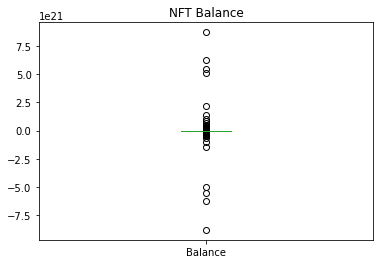

In [ ]:
#Box plot for NFT
NFT_bal.plot.box(x="address",y="Balance")
plt.title('NFT Balance')
plt.show()

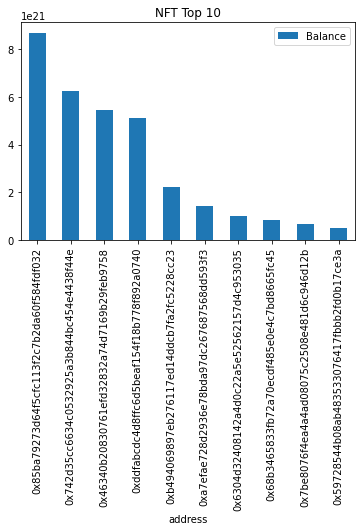

In [ ]:
#Bar chart for NFT
NFT_bal[:10].plot.bar(x="address",y="Balance")
plt.title('NFT Top 10')
plt.show()

## Balance of adresses in transactions NFTs

In [ ]:
#FT
FT_bal = new_bal[new_bal["Type"]==1].sort_values(by="Balance",ascending=False)
FT_bal

,address,Type,Balance
59688,0xc679badc1ef36c2cc7df1d73a17af489a030bb25,1.0,2.482000e+21
46741,0x3993d34e7e99abf6b6f367309975d1360222d446,1.0,2.441800e+21
59411,0xc36442b4a4522e871399cd717abdd847ab11fe88,1.0,2.303428e+21
51106,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1.0,1.654607e+21
31230,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,1.0,1.391744e+21
...,...,...,...
4346,0x1a20ae34c0544c6ab2a32dce700909aa9ea4d208,1.0,-9.999982e+20
17750,0x6cb9e8ffd0da91e27262ec1d28d5d0e495e398a1,1.0,-1.000000e+21
17389,0x6a522f7ad8ffe69e2b076e13c73dc698efbd8044,1.0,-2.038000e+21
18951,0x741aa7cfb2c7bf2a1e7d4da2e3df6a56ca4131f3,1.0,-2.196000e+21


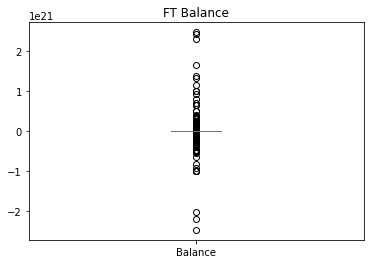

<Figure size 432x288 with 0 Axes>

In [ ]:
#Box plot for FT
FT_bal.plot.box(x="address",y="Balance")
plt.title('FT Balance')
plt.show()

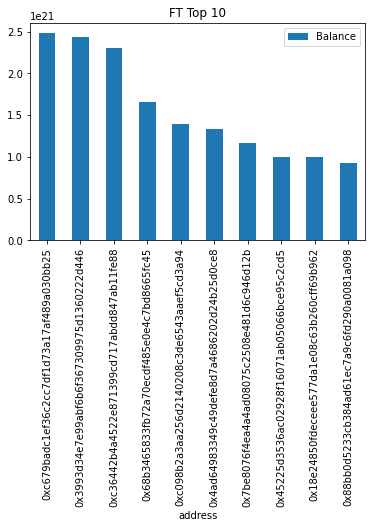

<Figure size 432x288 with 0 Axes>

In [ ]:
#Bar chart for FT
FT_bal[:10].plot.bar(x="address",y="Balance")
plt.title('FT Top 10')
plt.show()

# Random Forest classification.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

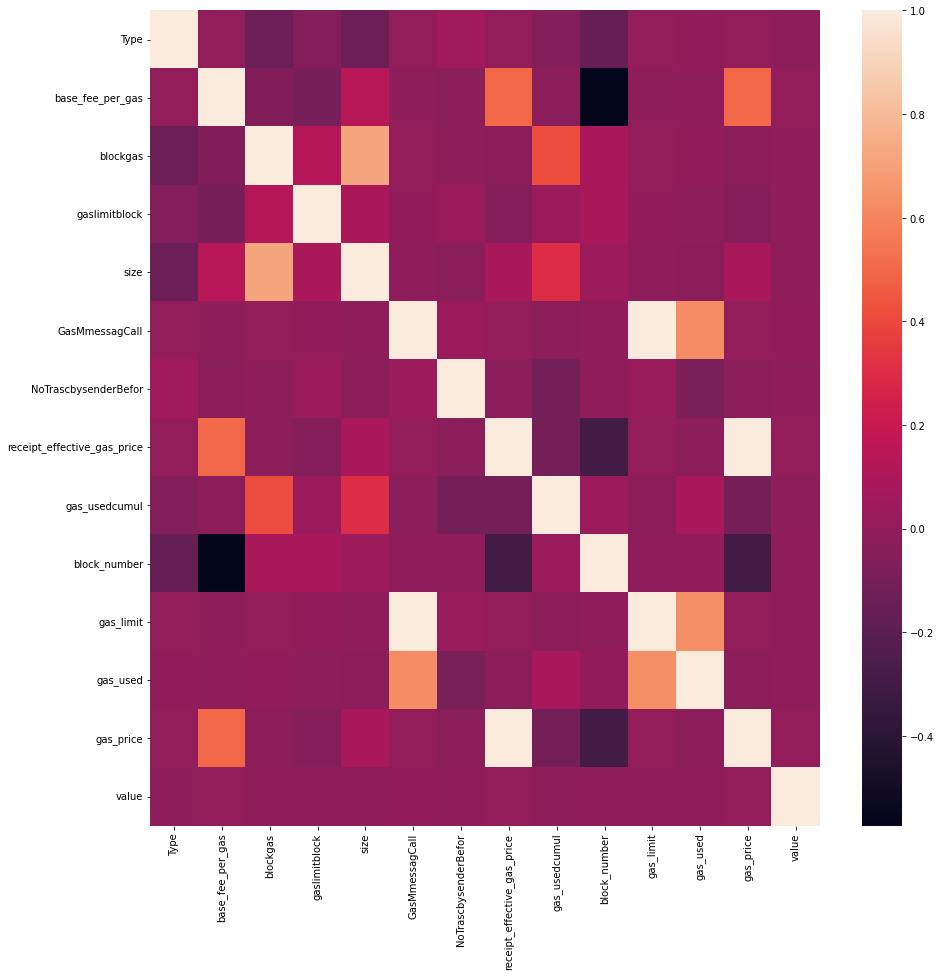

In [ ]:
data = df_all[['Type', 'base_fee_per_gas', 'blockgas', 'gaslimitblock', 'size', 'total_difficulty', 'GasMmessagCall', 'NoTrascbysenderBefor', 'receipt_effective_gas_price', 'gas_usedcumul', 'block_number', 'gas_limit', 'gas_used', 'gas_price', 'value']]

y = data['Type']
x = data[['base_fee_per_gas', 'blockgas', 'gaslimitblock', 'size', 'total_difficulty', 'GasMmessagCall', 'NoTrascbysenderBefor', 'receipt_effective_gas_price', 'gas_usedcumul', 'block_number', 'gas_limit', 'gas_used', 'gas_price', 'value']]

fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr())

In [ ]:
#dividing the data into train and test sample
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
#Random forest model.
clf = RandomForestClassifier(n_estimators=100, max_depth = 5, random_state = 100)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=100)

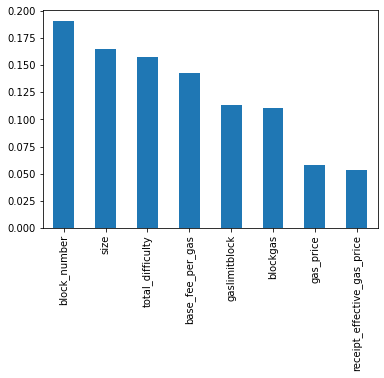

In [ ]:
#plotting feature importance.
feat_imp = clf.feature_importances_
pd.Series(feat_imp, index=x.columns).nlargest(8).plot(kind='bar')

In [ ]:
# Prediction.
y_pred = clf.predict(x_test)

In [ ]:
# Metrics accuracy scores.
metrics.accuracy_score(y_pred, y_test)

0.8024422442244225

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

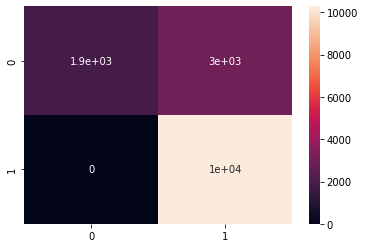

In [ ]:
sns.heatmap(cf_matrix, annot=True)